### Identifying sets of metrics

We have some sets of metrics "pre-packaged" if you will, to look at what seems to be the interesting to compare summary stats between different runs, for some science goals. 
This notebook gives some examples of finding new sets of metrics to add to those packages, for comparing between runs. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet
from IPython.display import display
import rubin_sim.maf as maf

In [3]:
# Download the information on the families - this helps us load up related sets of simulations,
# while progressing in expected impact through survey simulation variations within each family.
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
families = maf.archive.get_family_descriptions()
family_list = families.index.values

In [4]:
# Download the summary csv file -- note that metric names may change between major updates in the CSV file
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'
summaries = maf.get_metric_summaries()

In [5]:
# Load the existing metric definition file -- this is what we'd like to update
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
# Load it from a local copy 
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

Why bother to identify metrics, and not just use the things that are put together in the metric_sets.json file?

First - the metric sets may have older names for the metric outputs (maybe the summary statistic changed, maybe the metric itself was updated) or it very likely just doesn't include a set that matches what you want to compare. 
The metric_set dataframe isn't required for use with the summaries dataframe, but it makes life easier.
The metric_set dataframe can be used with the functions in `maf.summary_plots` to normalize the dataframe automatically (including inverting columns that should be inverted, and treating as magnitudes those that should be magnitudes), as well as to set linestyles, short cuts for the metric names, and prettier plots. 
See this [archive + summary_plots tutorial](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/tutorial/04_Getting_Data.ipynb) for extra information.

Let's try to identify some more sets to work into the pre-packaged metric_sets file. 

In [6]:
# What groups of metrics already exist?
msets = list(metric_set.groupby('metric set').first().index)
msets

for k in msets:
    print(k, len(metric_set.loc[k]))
    # Check that the metrics are correctly named and in the summary file
    summaries.loc[:, metric_set.loc[k]['metric']]

AGN N QSO 6
AGN SF 12
AGN SF DDF 30
AGN timelag 12
DESC SN DDF 15
DESC WFD 9
N Visits 9
SRD 5
SSO N Objs 6
SSO discovery 14
SSO discovery options 22
SSO fraction 3 bands 14
SSO fraction 4 bands 14
SSO fraction 5 bands 14
SSO fraction 6 bands 14
SSO lightcurve inversion 8
TVS KNe 7
TVS PeriodDetect 6
TVS PeriodModulation 8
TVS Presto 2
TVS TDE 5
TVS XRB 3
TVS microlensing 4
TVS microlensing all 27
TVS short 8
cadence 8
galaxies 1
plot areas 5
radar 13
short description 10


Set up a new metric set and look at the outputs. 
Let's pretend we were interesting in evaluating why a particular simulation might be doing better for our metric -- did the depth per visit/coadded depth or number of visits change?

In [15]:
# If you have a general idea of the metric name, but don't know it specifically, 
# it can be helpful to narrow it down by searching through the columns in the summary dataframe
#  .. I tend to start as short as possible, and add more conditions to narrow it down
[m for m in summaries if "Coadd" in m and 'WFD' in m and 'Median' in m and 'Exgal' not in m]

['Median CoaddM5 WFD r band HealpixSubsetSlicer',
 'Median CoaddM5 WFD y band HealpixSubsetSlicer',
 'Median CoaddM5 WFD i band HealpixSubsetSlicer',
 'Median CoaddM5 WFD z band HealpixSubsetSlicer',
 'Median CoaddM5 WFD g band HealpixSubsetSlicer',
 'Median CoaddM5 WFD u band HealpixSubsetSlicer']

In [17]:
# We have to copy the *exact* metric name to find it in the summaries file
metrics = [f"Median CoaddM5 WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Mean Median fiveSigmaDepth WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Median NVisits WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
# But we can add shorter nanes for plot labels if we're sure to remember which one is which
short_names = [f"Median coadd depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median single image depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median NVisits {f} WFD" for f in 'ugrizy']
# Then we can add linestyles if desired - have to match length above
styles = (['c-', 'g-', 'y-', 'r-', 'm-', 'k-'] + ['c-.', 'g-.', 'y-.', 'r-.', 'm-.', 'k-.'] 
          + ['c:', 'g:', 'y:', 'r:', 'm:', 'k:'])
# Some of these are magnitude values, and we should normalize them differently (1+/- delta, not divide)
mags = [True]*6 + [True]*6 + [False]*6
# And we could invert metrics, if 'bigger was worse', but these are fine as-is
invert = False
new = maf.create_metric_set_df('WFD Depths', metrics, short_names, style=styles, mag=mags, invert=invert)
new

metric  \
metric set metric                                                                                                  
WFD Depths Median CoaddM5 WFD u band HealpixSubsetSlicer           Median CoaddM5 WFD u band HealpixSubsetSlicer   
           Median CoaddM5 WFD g band HealpixSubsetSlicer           Median CoaddM5 WFD g band HealpixSubsetSlicer   
           Median CoaddM5 WFD r band HealpixSubsetSlicer           Median CoaddM5 WFD r band HealpixSubsetSlicer   
           Median CoaddM5 WFD i band HealpixSubsetSlicer           Median CoaddM5 WFD i band HealpixSubsetSlicer   
           Median CoaddM5 WFD z band HealpixSubsetSlicer           Median CoaddM5 WFD z band HealpixSubsetSlicer   
           Median CoaddM5 WFD y band HealpixSubsetSlicer           Median CoaddM5 WFD y band HealpixSubsetSlicer   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Mean Median fiveSigmaDepth WFD u band HealpixS...   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Mean Median fiveSigmaDepth WFD g band HealpixS...   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Mean Median fiveSigmaDepth WFD r band HealpixS...   
           Mean Median fiveSigmaDepth WFD i band HealpixSu...  Mean Median fiveSigmaDepth WFD i band HealpixS...   
           Mean Median fiveSigmaDepth WFD z band HealpixSu...  Mean Median fiveSigmaDepth WFD z band HealpixS...   
           Mean Median fiveSigmaDepth WFD y band HealpixSu...  Mean Median fiveSigmaDepth WFD y band HealpixS...   
           Median NVisits WFD u band HealpixSubsetSlicer           Median NVisits WFD u band HealpixSubsetSlicer   
           Median NVisits WFD g band HealpixSubsetSlicer           Median NVisits WFD g band HealpixSubsetSlicer   
           Median NVisits WFD r band HealpixSubsetSlicer           Median NVisits WFD r band HealpixSubsetSlicer   
           Median NVisits WFD i band HealpixSubsetSlicer           Median NVisits WFD i band HealpixSubsetSlicer   
           Median NVisits WFD z band HealpixSubsetSlicer           Median NVisits WFD z band HealpixSubsetSlicer   
           Median NVisits WFD y band HealpixSubsetSlicer           Median NVisits WFD y band HealpixSubsetSlicer   

                                                                                    short_name  \
metric set metric                                                                                
WFD Depths Median CoaddM5 WFD u band HealpixSubsetSlicer              Median coadd depth u WFD   
           Median CoaddM5 WFD g band HealpixSubsetSlicer              Median coadd depth g WFD   
           Median CoaddM5 WFD r band HealpixSubsetSlicer              Median coadd depth r WFD   
           Median CoaddM5 WFD i band HealpixSubsetSlicer              Median coadd depth i WFD   
           Median CoaddM5 WFD z band HealpixSubsetSlicer              Median coadd depth z WFD   
           Median CoaddM5 WFD y band HealpixSubsetSlicer              Median coadd depth y WFD   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Median single image depth u WFD   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Median single image depth g WFD   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Median single image depth r WFD   
           Mean Median fiveSigmaDepth WFD i band HealpixSu...  Median single image depth i WFD   
           Mean Median fiveSigmaDepth WFD z band HealpixSu...  Median single image depth z WFD   
           Mean Median fiveSigmaDepth WFD y band HealpixSu...  Median single image depth y WFD   
           Median NVisits WFD u band HealpixSubsetSlicer                  Median NVisits u WFD   
           Median NVisits WFD g band HealpixSubsetSlicer                  Median NVisits g WFD   
           Median NVisits WFD r band HealpixSubsetSlicer                  Median NVisits r WFD   
           Median NVisits WFD i band HealpixSubsetSlicer                  Median NVisits i WFD   
           Median NVi

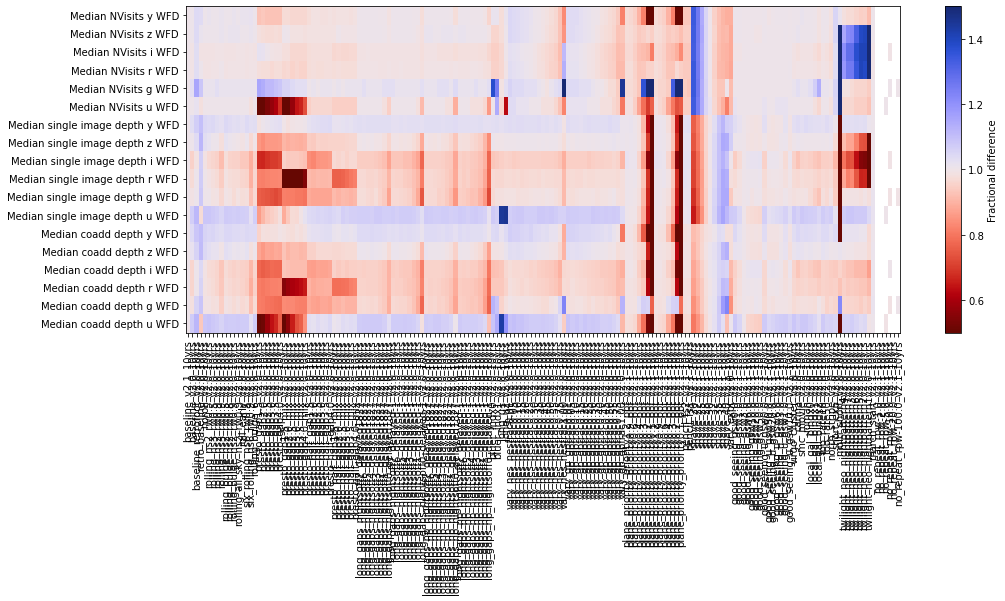

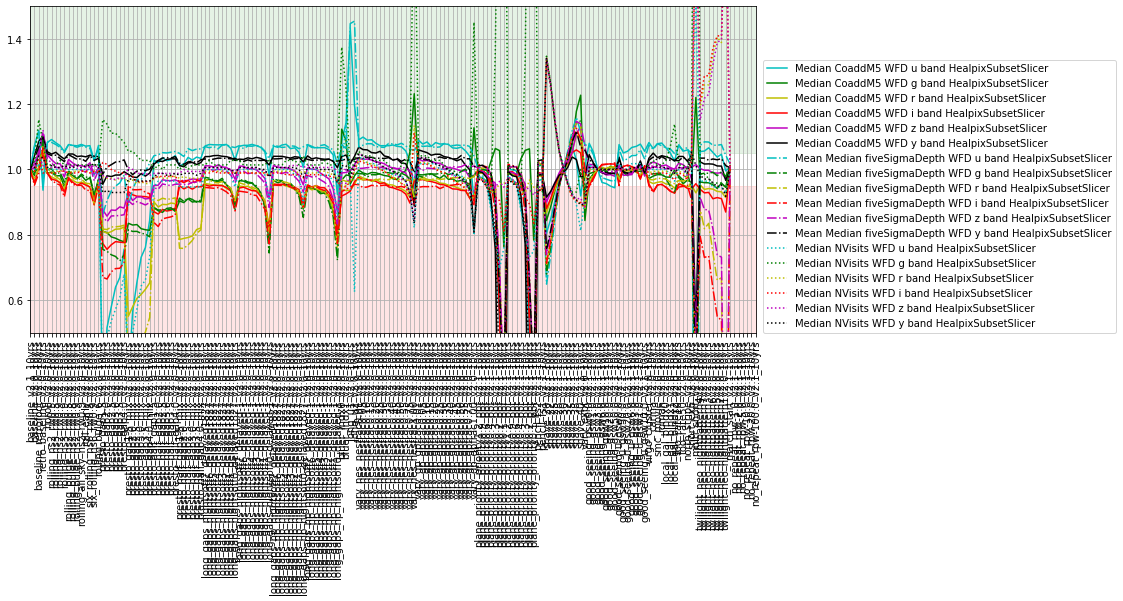

In [21]:
# Look at metric results
k = 'WFD Depths'

fams = [f for f in family_list if not f.startswith('ddf')]

these_runs = families.explode('run').loc[fams]['run']
baseline = 'baseline_v2.1_10yrs'

# For a lot of runs or a lot of metrics, the mesh can work best
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, new.loc[k]['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=new.loc[k]['short_name'],
                                  metric_set=new.loc[k], 
                                  color_range=1)
fig.set_figwidth(16)

# But the line plots can be good too, especially for smaller sets of values
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run=baseline,
                              metric_set=new.loc[k],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

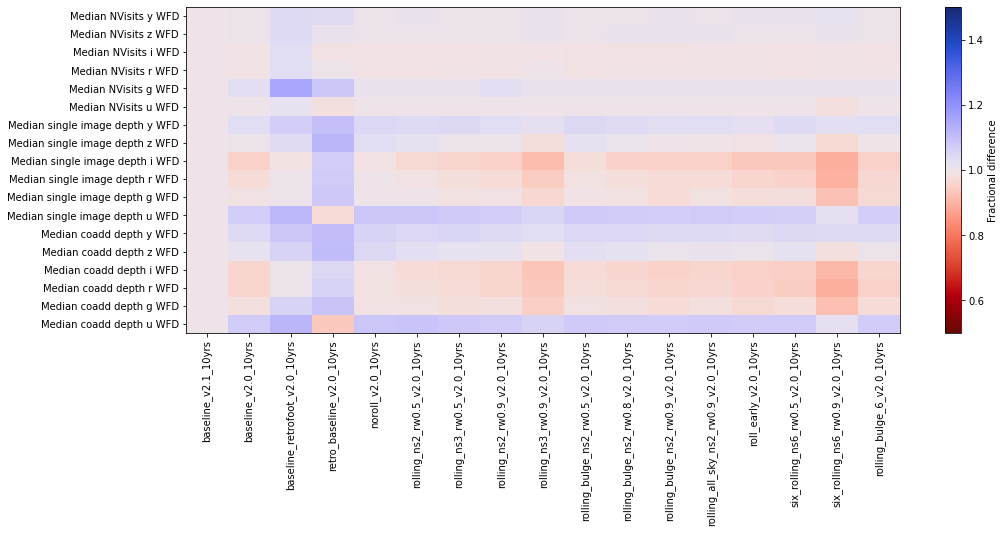

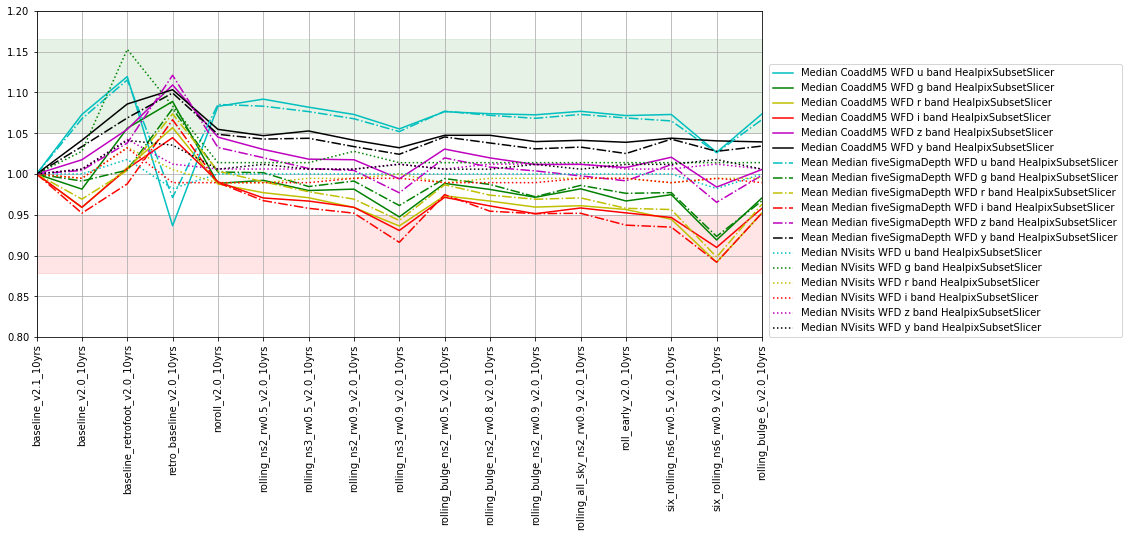

In [24]:
# Maybe look closer at some families 
k = 'WFD Depths'
fams = ['baseline', 'rolling']
these_runs = families.explode('run').loc[fams]['run']
baseline = 'baseline_v2.1_10yrs'

# For a lot of runs or a lot of metrics, the mesh can work best
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, new.loc[k]['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=new.loc[k]['short_name'],
                                  metric_set=new.loc[k], 
                                  color_range=1)
fig.set_figwidth(16)

# But the line plots can be good too, especially for smaller sets of values
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run=baseline,
                              metric_set=new.loc[k],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.8, 1.2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

In [25]:
# Write this new set back into the metric_sets if desired 
tmp = pd.concat([metric_set, new])
maf.write_metric_sets('metric_set_new.json', tmp)

In [26]:
# Check the new file is readable
metrics_source = 'metric_set_new.json'
nn = maf.get_metric_sets(metrics_source)

In [27]:
list(nn.groupby('metric set').first().index)

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN timelag',
 'DESC SN DDF',
 'DESC WFD',
 'N Visits',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'TVS KNe',
 'TVS PeriodDetect',
 'TVS PeriodModulation',
 'TVS Presto',
 'TVS TDE',
 'TVS XRB',
 'TVS microlensing',
 'TVS microlensing all',
 'TVS short',
 'WFD Depths',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']